In [1]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv("Avacado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.shape

(1517, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 148.2+ KB


In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'].astype(str))
df['type']=le.fit_transform(df['type'].astype(str))

In [8]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

Drop Date Column

In [28]:
#df.drop(['Date'],axis=1,inplace=True) #Already dropped
df.drop(['type'],axis=1,inplace=True)

Null Values Identification

In [10]:
df.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Null Value Graphical Representation

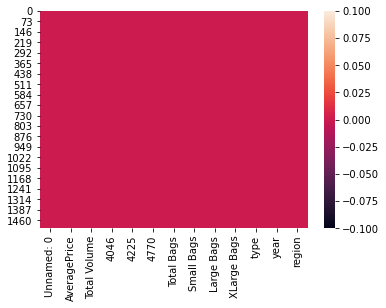

In [11]:
sb.heatmap(df.isnull())

No Null Values Identified

Correlation 

In [12]:
dfcor=df.corr()
dfcor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144


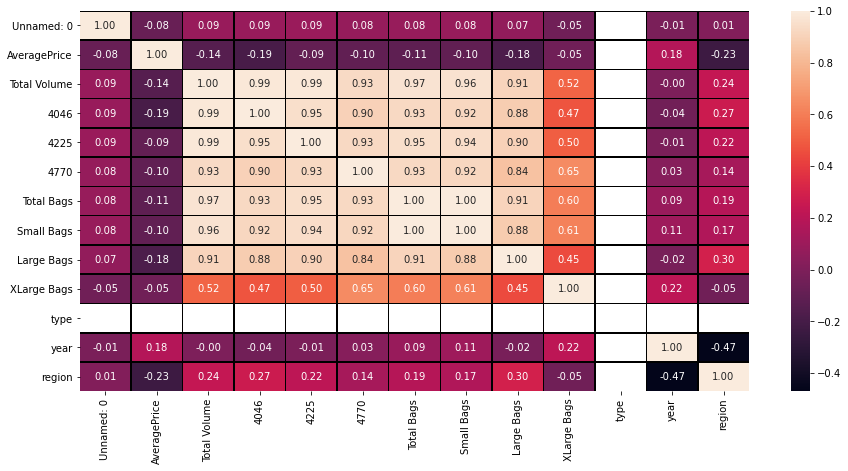

In [13]:
corr=df.corr()
plt.figure(figsize=(15,7))
sb.heatmap(corr,annot=True,linewidths=0.5,linecolor="black",fmt=".2f")
plt.show()

Statictical Description

In [14]:
round(df.describe(),2)


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.0,1517.00,1517.00
mean,27.00,1.07,1601879.07,646438.65,611437.50,50405.50,293597.42,248773.60,42642.05,2181.77,0.0,2015.16,21.20
std,14.85,0.19,4433142.82,1947613.57,1672906.16,137781.25,757976.53,647476.52,118215.68,7455.71,0.0,0.37,16.13
min,0.00,0.49,38750.74,467.72,1783.77,0.00,3311.77,3311.77,0.00,0.00,0.0,2015.00,0.00
25%,14.00,0.98,147469.99,20400.34,41476.06,911.25,36206.89,29727.22,540.74,0.00,0.0,2015.00,6.00
50%,29.00,1.08,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,5044.35,0.00,0.0,2015.00,19.00
75%,39.00,1.19,981975.08,377578.48,485150.34,29167.30,157609.68,146199.35,29267.67,401.48,0.0,2015.00,35.00
max,51.00,1.68,44655461.51,18933038.04,18956479.74,1381516.11,6736304.04,5893641.72,1121076.47,108072.79,0.0,2016.00,50.00


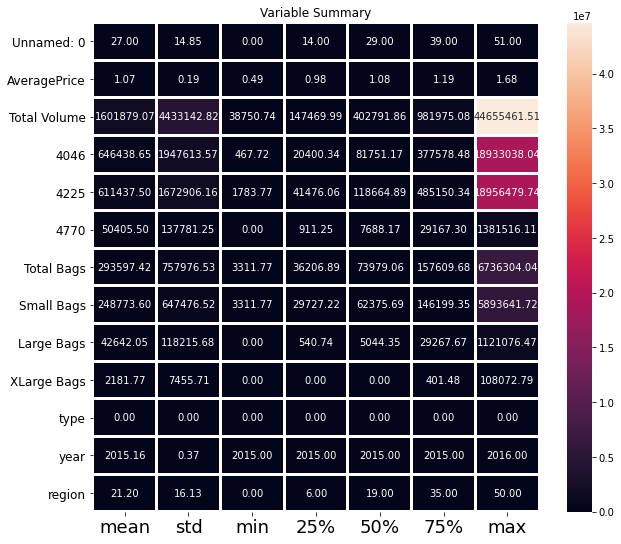

In [15]:
plt.figure(figsize=(10,9))
sb.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

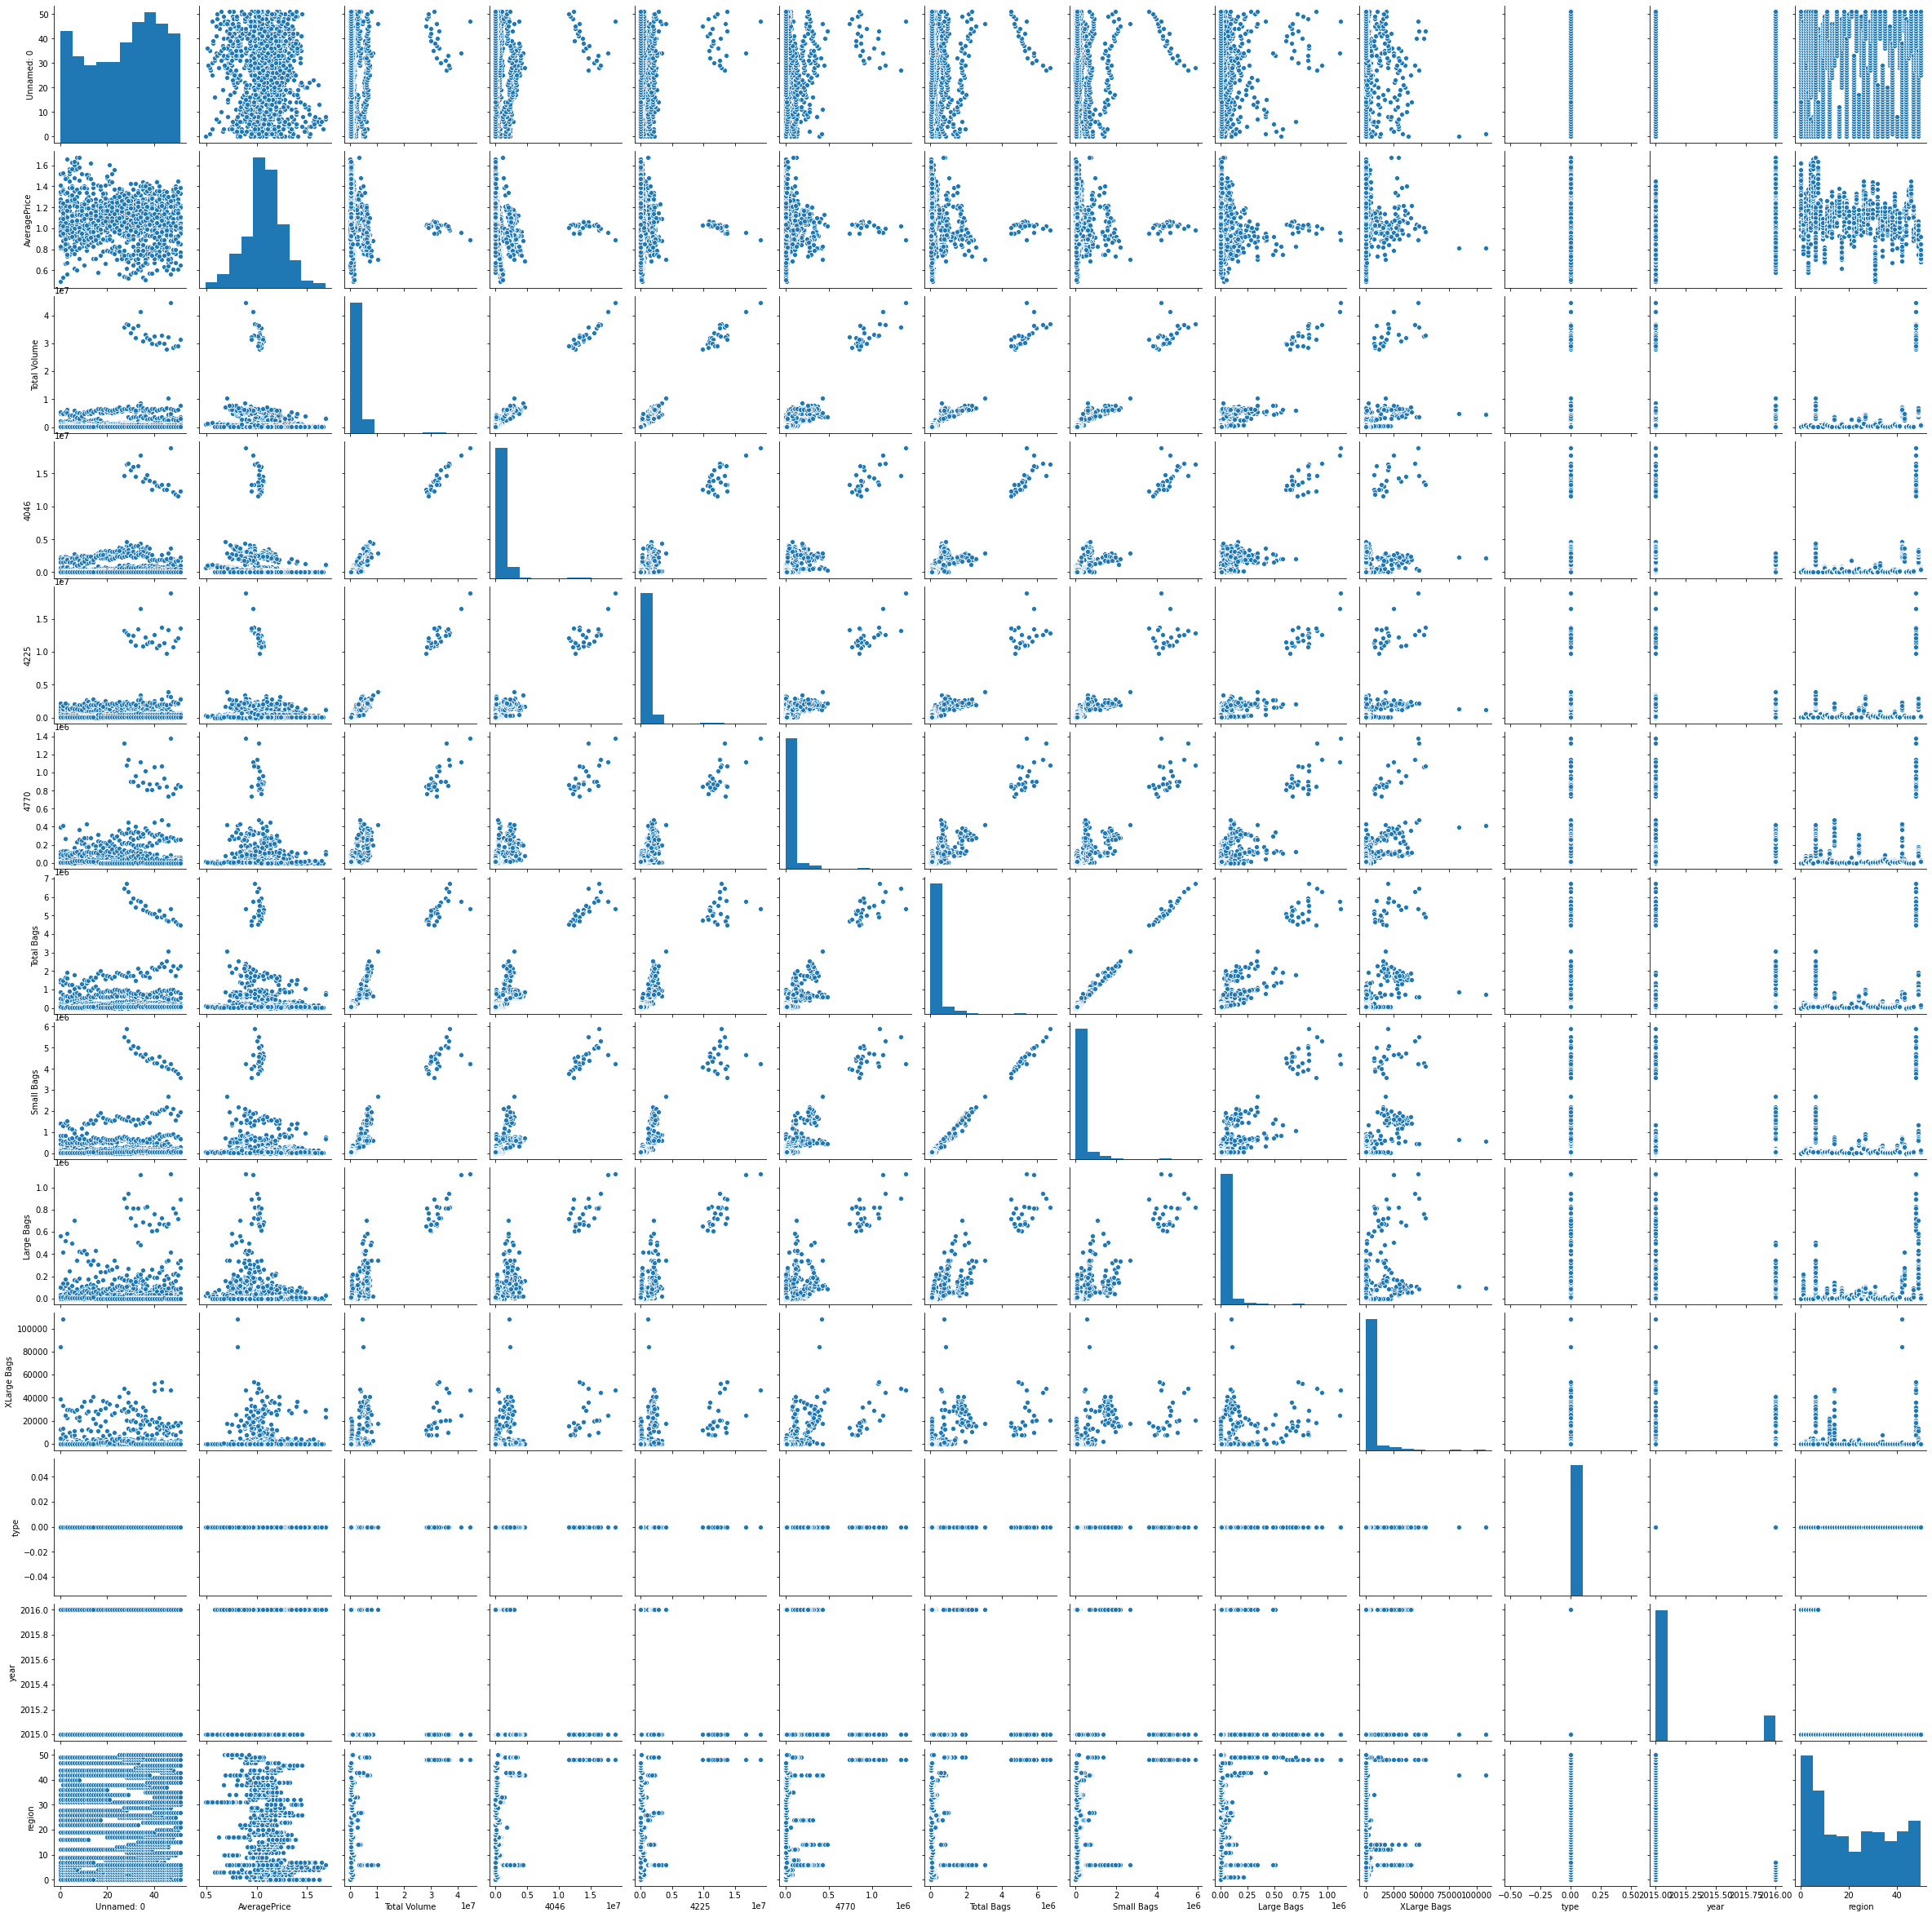

In [16]:
sb.pairplot(df)

Outlier Checking

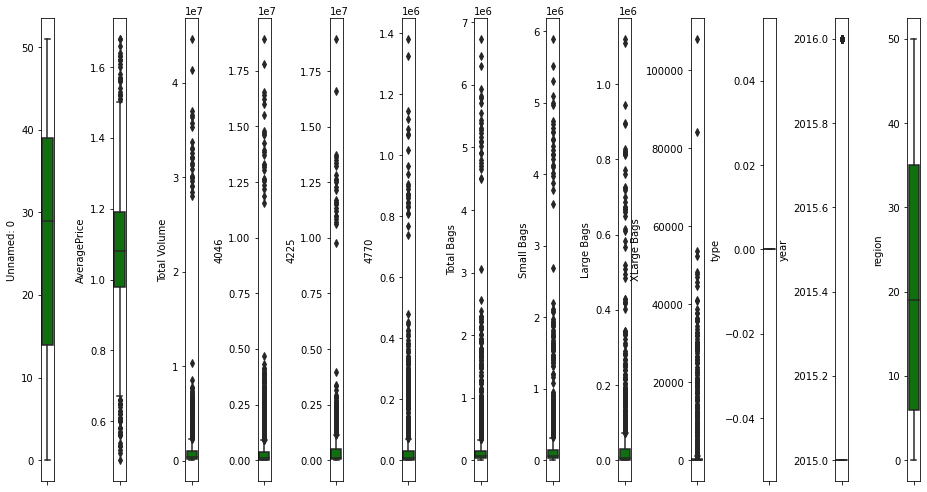

In [17]:
collist=df.columns.values
ncol=20
nrows=9
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Skewness

In [18]:
round(df.skew(),2)

Unnamed: 0     -0.23
AveragePrice   -0.11
Total Volume    6.20
4046            6.05
4225            6.39
4770            5.41
Total Bags      5.37
Small Bags      5.36
Large Bags      5.14
XLarge Bags     5.78
type            0.00
year            1.83
region          0.29
dtype: float64

Outcomes of Skewness: I have taken thresold value of skewness +/- .65. Columns having high skewness except Region, Avg.Price, Unnamed

Treating Skewness

In [19]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])


Bi - Variant Ananlysis

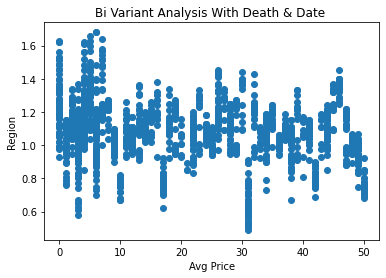

In [20]:
plt.scatter(df["region"],df['AveragePrice'])
plt.title("Bi Variant Analysis With Death & Date ")
plt.ylabel('Region')
plt.xlabel('Avg Price')
plt.show()

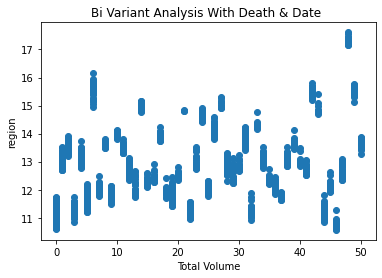

In [21]:
plt.scatter(df["region"],df['Total Volume'])
plt.title("Bi Variant Analysis With Death & Date ")
plt.ylabel('region')
plt.xlabel('Total Volume')
plt.show()

Removing Outliers

In [30]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1517, 12)

In [31]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print (df_new.shape)

(1517, 12)
(1502, 12)


In [32]:
loss_percentage=(1517-1502)/1517*100
print (round(loss_percentage,2),"%")

0.99 %


Assigning Values

In [36]:
#Target Variable Avg Price
y=df_new.iloc[:,1]
y.shape



(1502,)

In [37]:
x=df_new.iloc[:,2:13]
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,7.608871,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,7.608871,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,7.608871,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,7.608871,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,7.608871,0
...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7.609367,7
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7.609367,7
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7.609367,7
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7.609367,7


Transfoeming Data To Remove Skewness

In [39]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.613149  , -1.72901002, -0.53845127, ..., -0.92605504,
         0.        , -1.69333618],
       [-1.79483744, -1.8799827 , -0.66285346, ..., -0.92605504,
         0.        , -1.69333618],
       [-0.96988066, -1.82273638, -0.11138844, ..., -0.92605504,
         0.        , -1.69333618],
       ...,
       [-0.58418153, -0.24329608, -0.55659472, ...,  1.17068911,
         0.        , -0.79062857],
       [-0.5323257 , -0.1768611 , -0.54839066, ..., -0.92605504,
         0.        , -0.79062857],
       [-0.56163482, -0.27434981, -0.54145085, ..., -0.92605504,
         0.        , -0.79062857]])

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-1.613149  , -1.72901002, -0.53845127, ..., -0.92605504,
         0.        , -1.69333618],
       [-1.79483744, -1.8799827 , -0.66285346, ..., -0.92605504,
         0.        , -1.69333618],
       [-0.96988066, -1.82273638, -0.11138844, ..., -0.92605504,
         0.        , -1.69333618],
       ...,
       [-0.58418153, -0.24329608, -0.55659472, ...,  1.17068911,
         0.        , -0.79062857],
       [-0.5323257 , -0.1768611 , -0.54839066, ..., -0.92605504,
         0.        , -0.79062857],
       [-0.56163482, -0.27434981, -0.54145085, ..., -0.92605504,
         0.        , -0.79062857]])

We Will Use Linear Regression as the Price keeps on changing with Influenceing parameters

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score



In [42]:
max_scr=0
for i in range(0,6000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random State",i,". The Model Is Performing Very Well")
        print("At Random State:-",i)
        print("Training r2_score is",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is",r2_score(y_test,pred_test)*100)

At Random State 43 . The Model Is Performing Very Well
At Random State:- 43
Training r2_score is 37.04494750838193
Testing r2_score is 37.04244935815212
At Random State 1125 . The Model Is Performing Very Well
At Random State:- 1125
Training r2_score is 37.11783374825014
Testing r2_score is 37.11638753060983
At Random State 2507 . The Model Is Performing Very Well
At Random State:- 2507
Training r2_score is 37.19332742256912
Testing r2_score is 37.18670790700064
At Random State 3632 . The Model Is Performing Very Well
At Random State:- 3632
Training r2_score is 36.848308182552934
Testing r2_score is 36.85024141155537
At Random State 5523 . The Model Is Performing Very Well
At Random State:- 5523
Training r2_score is 37.15220588730723
Testing r2_score is 37.14878632938564


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=1223) #Random state = 1223

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Regularisation

Lasso

In [45]:
from sklearn.linear_model import Lasso
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 1e-05, 'random_state': 0}


In [46]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",lsc*100)
    print ("R2_score is :-",lss*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- -7.764669560294313
R2_score is :- -0.08983241228504024


At CV :- 3
Cross Validation Score is :- -0.7751480281238472
R2_score is :- -0.08983241228504024


At CV :- 4
Cross Validation Score is :- -8.56532370688981
R2_score is :- -0.08983241228504024


At CV :- 5
Cross Validation Score is :- -4.3078322392691515
R2_score is :- -0.08983241228504024


At CV :- 6
Cross Validation Score is :- -21.65788185441162
R2_score is :- -0.08983241228504024


At CV :- 7
Cross Validation Score is :- -10.376400662755294
R2_score is :- -0.08983241228504024


At CV :- 8
Cross Validation Score is :- -16.879964086420703
R2_score is :- -0.08983241228504024


At CV :- 9
Cross Validation Score is :- -7.671693208300666
R2_score is :- -0.08983241228504024




In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 0.13920119169794826
Mean Square Error: 0.03235741079816988
Root Mean Sqaured Error: 0.17988165775912196


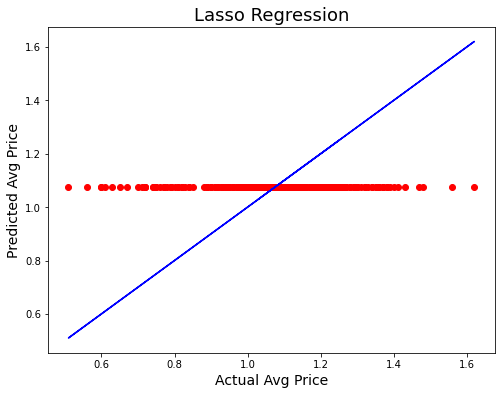

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Avg Price',fontsize=14)
plt.ylabel('Predicted Avg Price',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
parameters ={'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'random_state':[1,2,3,4,5,6,7,8,9]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 1, 'fit_intercept': True, 'normalize': False, 'random_state': 1}


In [50]:
ridge=Ridge(alpha=1,random_state=1,fit_intercept=True,normalize= False)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdd=r2_score(y_test,pred_rd)
for j in range(2,10):
    rdscore = cross_val_score(rd,x_t,y,cv=j)
    rdc=rdscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",rdc*100)
    print ("R2_score is :-",rdc*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- -2.0316078893264478
R2_score is :- -2.0316078893264478


At CV :- 3
Cross Validation Score is :- 14.115697657710683
R2_score is :- 14.115697657710683


At CV :- 4
Cross Validation Score is :- 10.195304416635832
R2_score is :- 10.195304416635832


At CV :- 5
Cross Validation Score is :- 12.304045394303557
R2_score is :- 12.304045394303557


At CV :- 6
Cross Validation Score is :- -3.9411940540830157
R2_score is :- -3.9411940540830157


At CV :- 7
Cross Validation Score is :- 7.1431025043418455
R2_score is :- 7.1431025043418455


At CV :- 8
Cross Validation Score is :- 0.4329410039500159
R2_score is :- 0.4329410039500159


At CV :- 9
Cross Validation Score is :- 3.031789239289679
R2_score is :- 3.031789239289679




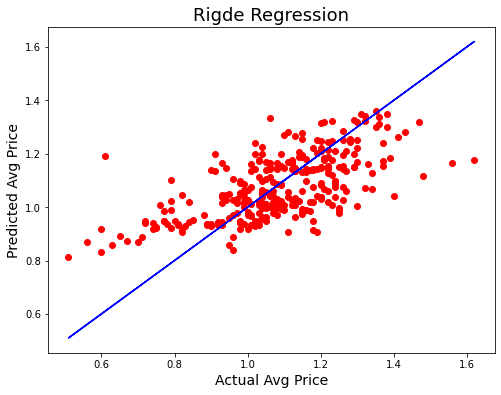

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Avg Price',fontsize=14)
plt.ylabel('Predicted Avg Price',fontsize=14)
plt.title('Rigde Regression',fontsize=18)
plt.show()

Ensemblier Technique

In [52]:
#Ensemblier Technique
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [53]:
dt=DecisionTreeRegressor(criterion='mse', splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("r2_score:",dts*100)
dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

r2_score: 68.40149204027364
Cross Val Score: -72.89967053423405


In [119]:
print("Error:")
print("Mean Absolute Error:",round(mean_absolute_error(y_test,pred_decision),2))
print("Mean Square Error:",round(mean_squared_error(y_test,pred_decision),2))
print("Root Mean Sqaured Error:",round(np.sqrt(mean_squared_error(y_test,pred_decision)),2))

Error:
Mean Absolute Error: 0.07
Mean Square Error: 0.01
Root Mean Sqaured Error: 0.1


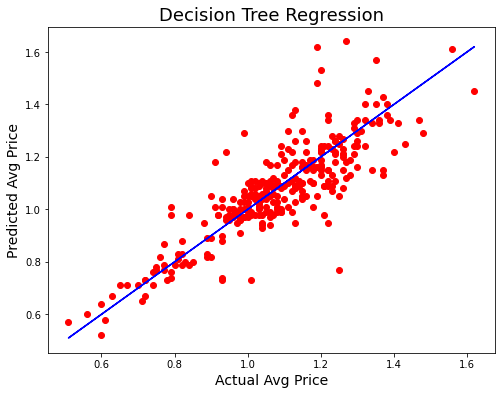

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Avg Price',fontsize=14)
plt.ylabel('Predicted Avg Price',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 300}


In [57]:
rf=RandomForestRegressor(criterion='friedman_mse', n_estimators= 300)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rd=rf.predict(x_test)
rfs=r2_score(y_test,pred_rd)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2_score: 83.22095663081102
Cross Val Score: 1.5697129703280928


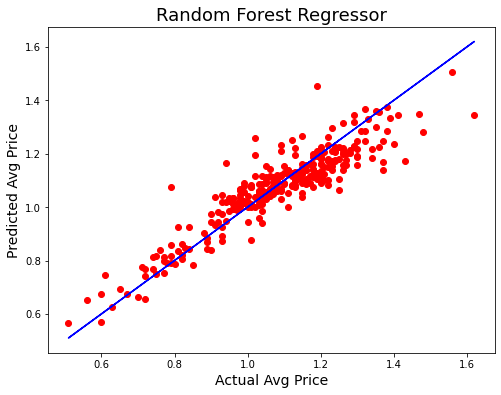

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Avg Price',fontsize=14)
plt.ylabel('Predicted Avg Price',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

Gredient Boosting Regressor

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}


In [60]:
gbr=GradientBoostingRegressor(criterion='friedman_mse', loss='ls',n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_random=gbr.predict(x_test)
gbrs=r2_score(y_test,pred_random)
print("r2_score:",round(gbrs*100,2))
gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc=gbscore.mean()
print('Cross Val Score:',round(gbrc*100,2))


r2_score: 76.94
Cross Val Score: -13.83


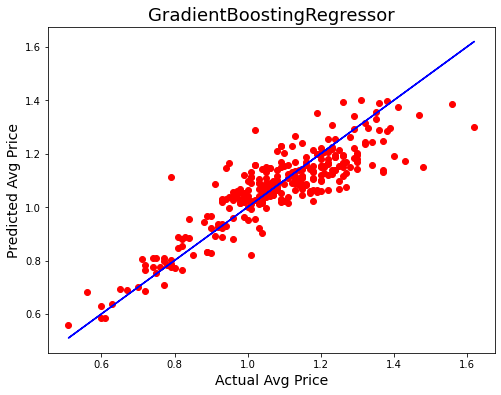

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_random,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Avg Price',fontsize=14)
plt.ylabel('Predicted Avg Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

In [62]:
from sklearn.svm import SVR
parameters = {'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'rbf'}


In [63]:
sv=SVR(kernel='rbf',gamma='auto')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("r2_score:",round(svs*100,2))
svscore = cross_val_score(sv,x_t,y,cv=3)
svc=svscore.mean()
print('Cross Val Score:',round(svc*100,2))


r2_score: 71.64
Cross Val Score: -8.25


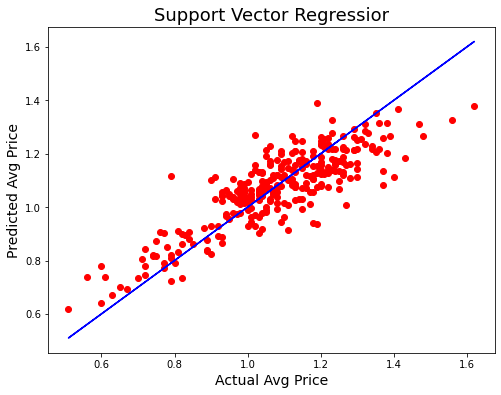

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_vector,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Avg Price',fontsize=14)
plt.ylabel('Predicted Avg Price',fontsize=14)
plt.title('Support Vector Regressior',fontsize=18)
plt.show()

In [120]:
import numpy as np
a=np.array(y_test)
a

array([1.25, 0.81, 0.79, 1.16, 1.37, 0.99, 1.08, 1.04, 1.13, 1.36, 1.22,
       1.04, 1.24, 1.01, 0.95, 1.03, 1.09, 0.51, 1.22, 1.03, 1.  , 1.3 ,
       1.37, 1.34, 1.06, 1.15, 1.27, 1.08, 0.89, 1.16, 1.29, 1.18, 1.04,
       0.99, 0.93, 1.15, 1.14, 1.06, 1.02, 1.18, 1.04, 0.98, 0.96, 0.88,
       1.  , 0.82, 1.23, 1.08, 1.43, 0.84, 1.15, 1.24, 1.01, 1.04, 0.77,
       0.99, 1.18, 1.07, 1.11, 1.23, 1.01, 0.99, 1.2 , 1.24, 1.15, 1.18,
       1.2 , 1.22, 1.09, 1.03, 1.32, 1.08, 1.39, 1.12, 1.12, 1.14, 1.  ,
       1.2 , 1.01, 1.13, 1.05, 1.03, 1.21, 1.16, 1.56, 0.65, 0.98, 1.22,
       1.12, 0.95, 1.36, 0.96, 1.06, 1.04, 0.97, 0.7 , 1.22, 1.03, 0.93,
       0.91, 1.35, 1.11, 1.05, 0.9 , 1.62, 1.25, 1.08, 1.12, 1.16, 1.23,
       1.19, 0.92, 0.77, 0.82, 0.8 , 1.09, 1.  , 1.37, 1.08, 0.75, 0.74,
       1.26, 1.3 , 1.28, 1.29, 1.07, 1.1 , 0.99, 1.18, 1.17, 0.9 , 0.89,
       1.07, 1.01, 1.14, 0.98, 0.99, 0.75, 1.16, 0.78, 1.21, 1.26, 1.18,
       1.25, 0.96, 0.94, 1.01, 1.27, 1.22, 1.07, 0.

In [121]:
df_com=pd.DataFrame({"Original":a,"Predicted":pred_rd},index=range(len(a)))
df_com

,Original,Predicted
0,1.25,1.064833
1,0.81,0.925567
2,0.79,0.815200
3,1.16,1.137600
4,1.37,1.139267
...,...,...
296,1.15,1.039567
297,1.25,1.224667
298,1.30,1.215967
299,1.13,1.194567


In [124]:
import pickle
filename='AR_Project3.pkl'
pickle.dump(rd,open(filename,'wb'))

# Classification

In [65]:
df_newc=df_new
df_newc

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,7.608871,0
1,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,7.608871,0
2,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,7.608871,0
3,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,7.608871,0
4,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,7.608871,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7.609367,7
1513,11,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7.609367,7
1514,12,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7.609367,7
1515,13,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7.609367,7


In [77]:
y1=df_newc.iloc[:,-1]
y1

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1502, dtype: int32

In [78]:
x1=df_newc.iloc[:,0:11]
x1

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,7.608871
1,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,7.608871
2,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,7.608871
3,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,7.608871
4,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,7.608871
...,...,...,...,...,...,...,...,...,...,...,...
1512,10,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7.609367
1513,11,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7.609367
1514,12,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7.609367
1515,13,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7.609367


In [75]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [81]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=42)
model=lg()
model.fit(x1_train,y1_train)

LogisticRegression()

In [82]:
pred=model.predict(x1_test)
print(pred) 

[37 26 37 14 17 22  5 28  4  9 35  5 31  4  1  2  7 23 15 46  6 41 48 50
 44 15  6  6 31  1  4 44  6 32 35 12 15 15  6  1 42 16  6 34 44 12 12 50
 23 31  2 20 46 49  2 26  0 18 11 38 44 22 18  1 22 19 10 17 50  6 10 46
 10  9  0 28 44 19 17 38 47  0  8 31 32  1 24 34 41  5 22  9  9  5 44 13
 15  2 23 13 40 49 17 16 19  0  1 37  0 45 18 26 23  8  2 15 50  4  2 44
 40 50 23 14  3 17 31 26 42 17 25  1 50 50 49  0 19 12 41  9 43  9 25  8
 46 38 42 28 11 34 35 44 47  6 19 46 38  5 12  0 37 12 42 44  2  2  7  6
 45 13  2  6 19 28  2  2 25  3 18 47  9 47  6  0 26  5 40 13 44 22 25  3
  0  1 38  4 44 10 30 14 30 47 37 17  6 38  6 34 12 34  1  6 22 38  9 12
 31 17 19  6 24 34 34 44 35 17  0  1 49 42 36 15  4  2 41 34 38  7 41  6
 25 44 33  2 19 19 25 25 26  3  6  9 23 50  9 42 12 29 39 47 33  2 23 38
  6 30 23  7 31 38 12  1 10 24 50  2 28 49 12 32 49 47 49 28  8 22  6  0
  1  5 24 42  2 23 17 34 24  6 26 41 13]


In [108]:
print ("Accuracy Score:",round(accuracy_score(y1_test,pred),2),'\n')
print ("Confusion Matrix:","\n","\n",confusion_matrix(y1_test,pred),'\n')
print ("Classification Report:","\n","\n",classification_report(y1_test,pred))

Accuracy Score: 0.82 

Confusion Matrix: 
 
 [[ 9  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  6]] 

Classification Report: 
 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      0.75      0.86        16
           2       0.81      1.00      0.90        13
           3       1.00      0.80      0.89         5
           4       1.00      0.86      0.92         7
           5       0.86      0.86      0.86         7
           6       0.90      1.00      0.95        18
           7       1.00      0.67      0.80         6
           8       1.00      0.57      0.73         7
           9       0.90      1.00      0.95         9
          10       0.80      0.80      0.80         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        11
          13 

In [109]:
mnb=MultinomialNB()
mnb.fit(x1_train,y1_train)
predmnb=mnb.predict(x1_test)
print('Accuracy Score:',round(accuracy_score(y1_test,predmnb),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y1_test,predmnb))
print('\n','Classification Report:','\n','\n',classification_report(y1_test,predmnb))

Accuracy Score: 0.33 	

 Confusion Matrix: 
 
 [[4 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 2]
 [0 0 1 ... 0 0 4]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.33      0.06      0.11        16
           2       0.11      0.08      0.09        13
           3       1.00      0.60      0.75         5
           4       0.20      0.14      0.17         7
           5       0.67      0.57      0.62         7
           6       0.58      0.61      0.59        18
           7       0.00      0.00      0.00         6
           8       1.00      0.14      0.25         7
           9       0.45      0.56      0.50         9
          10       0.00      0.00      0.00         5
          11       0.20      0.50      0.29         2
          12       0.67      0.36      0.47        11
          13       0.14      0.25      0.18    

In [110]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(x1_train,y1_train)
    svc.score(x1_train,y1_train)
    predsvc=svc.predict(x1_test)
    print('Accuracy Score:',round(accuracy_score(y1_test,predsvc),2),'\t')
    print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y1_test,predsvc))
    print('\n','Classification Report:','\n','\n',classification_report(y1_test,predsvc))

In [111]:
svmkernel("poly")

Accuracy Score: 0.83 	

 Confusion Matrix: 
 
 [[10  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  7]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.89      0.50      0.64        16
           2       0.76      1.00      0.87        13
           3       0.83      1.00      0.91         5
           4       1.00      0.86      0.92         7
           5       0.71      0.71      0.71         7
           6       0.95      1.00      0.97        18
           7       0.62      0.83      0.71         6
           8       1.00      0.71      0.83         7
           9       0.82      1.00      0.90         9
          10       0.80      0.80      0.80         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        11
          1

In [112]:
svmkernel("rbf")

Accuracy Score: 0.83 	

 Confusion Matrix: 
 
 [[10  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  7]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.89      0.50      0.64        16
           2       0.76      1.00      0.87        13
           3       0.83      1.00      0.91         5
           4       1.00      0.86      0.92         7
           5       0.71      0.71      0.71         7
           6       0.95      1.00      0.97        18
           7       0.62      0.83      0.71         6
           8       1.00      0.71      0.83         7
           9       0.82      1.00      0.90         9
          10       0.80      0.80      0.80         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        11
          1

In [113]:
dtc=DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
dtc.score(x1_train,y1_train)
preddtc=dtc.predict(x1_test)
print('Accuracy Score:',round(accuracy_score(y1_test,preddtc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y1_test,preddtc))
print('\n','Classification Report:','\n','\n',classification_report(y1_test,preddtc))

Accuracy Score: 0.89 	

 Confusion Matrix: 
 
 [[ 8  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       1.00      0.94      0.97        16
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         5
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         7
           6       0.94      0.94      0.94        18
           7       0.60      1.00      0.75         6
           8       1.00      1.00      1.00         7
           9       1.00      0.78      0.88         9
          10       0.83      1.00      0.91         5
          11       0.67      1.00      0.80         2
          12       0.91      0.91      0.91        11
          1

In [114]:
knn=KNeighborsClassifier()
knn.fit(x1_train,y1_train)
knn.score(x1_train,y1_train)
predknn=knn.predict(x1_test)
print('Accuracy Score:',round(accuracy_score(y1_test,predknn),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y1_test,predknn))
print('\n','Classification Report:','\n','\n',classification_report(y1_test,predknn))

Accuracy Score: 0.71 	

 Confusion Matrix: 
 
 [[10  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  5]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.56      0.60        16
           2       0.67      0.92      0.77        13
           3       0.62      1.00      0.77         5
           4       0.75      0.86      0.80         7
           5       0.60      0.86      0.71         7
           6       0.84      0.89      0.86        18
           7       0.50      0.67      0.57         6
           8       1.00      0.29      0.44         7
           9       0.75      1.00      0.86         9
          10       0.67      0.40      0.50         5
          11       0.40      1.00      0.57         2
          12       1.00      1.00      1.00        11
          1

In [ ]:
Decision Tree Classifier is having the best accuracy score of 89% when compare with other Classifier models.

In [125]:
import pickle
filename='AC_Project3.pkl'
pickle.dump(rd,open(filename,'wb'))